Variables object keys: dict_keys(['_is_copy', '_mgr', '_item_cache', '_attrs', '_flags'])


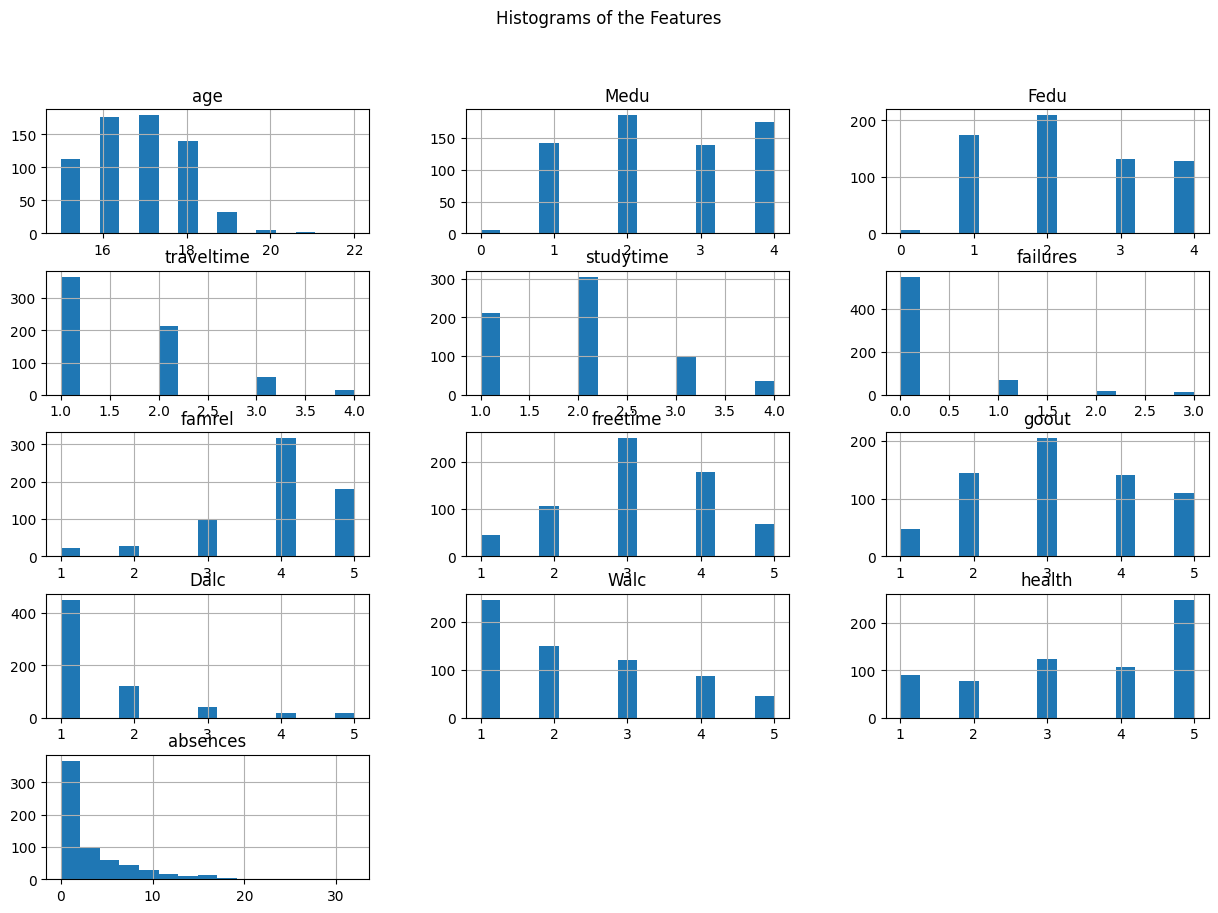

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
              age        Medu        Fedu  traveltime   studytime    failures  \
count  

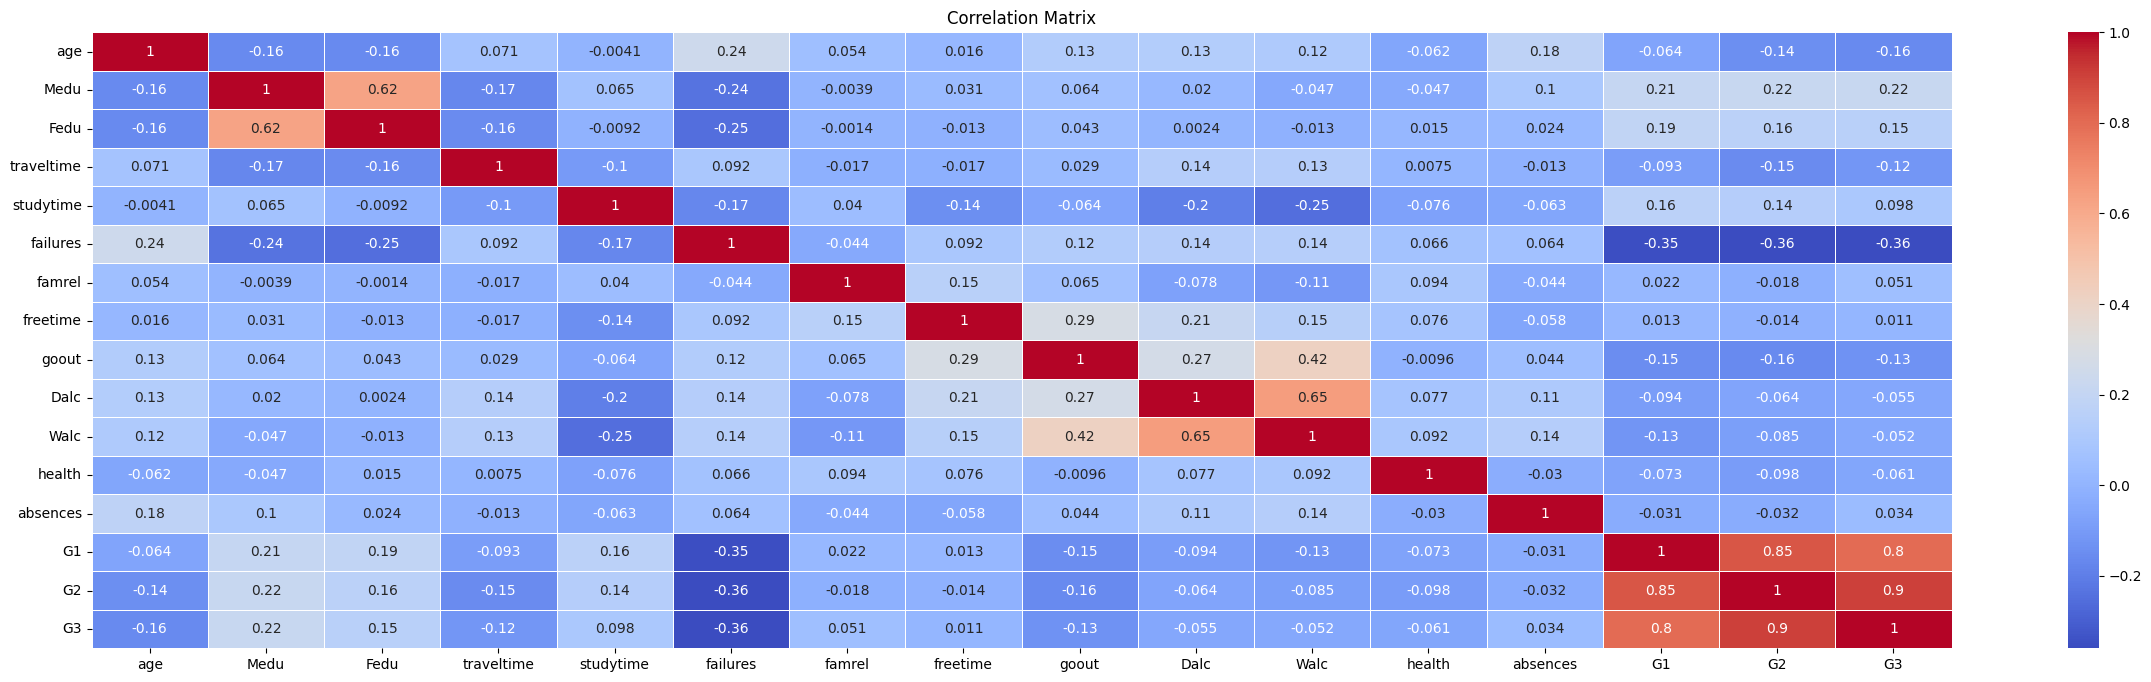

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


#Explore the dataset (EDA)
#called the data set two ways when I started decided to keep both since it worked

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'

student_performance = fetch_ucirepo(id=320)

X = student_performance.data.features
Y = student_performance.data.targets
print("Variables object keys:", student_performance.variables.__dict__.keys())


X.hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.suptitle('Histograms of the Features')
plt.show()


import requests, zipfile, io

r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


df = pd.read_csv('student-mat.csv', sep=';')

print("===========================================")
print(df.head())


print(df.describe())


print(df.info())

#creating the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [2]:
pip install ucimlrepo

# **Hypothesis 1: There is a correlation between studytime and better final grades.**

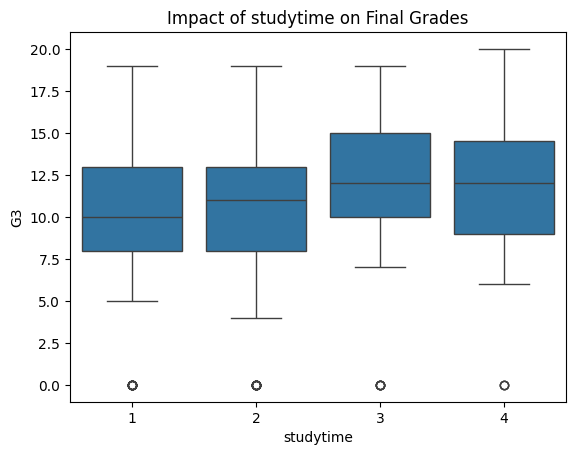

In [38]:
sns.boxplot(x='studytime', y='G3 (final grade)', data=df)
plt.title('Impact of studytime on Final Grades')
plt.show()

From this image, we can see that there is a positive correlation between the ammount of time studying with a student's final grades. We are able to tell from the average grade being higher as students study for more 1 hour, etc.

# **Hypothesis 2: There is a correlation between number of failed classes and a student's final grade**

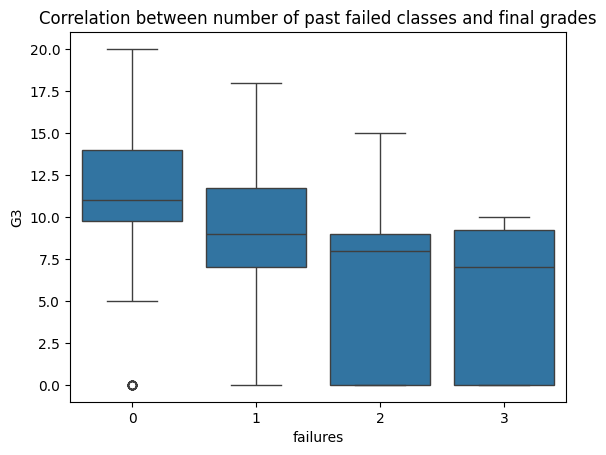

In [48]:
sns.boxplot(x='failures', y='G3 (final grade)', data=df)
plt.title('Correlation between number of past failed classes and final grades')
plt.show()

From the data, we can see that as students with high past failed classes, the average for their final grade decreases. This is per the middle line on the graph. We can also see that the range of the data decreases, and there is a lower 'likihood' that students will get higher final grades given that they have already failed 3 classes beforehand.

# **Conclusion:**

Through the use of graphing, I was able to first print out all the data that's needed. From there, I looked through the data, see if there were any potential correlations betweeen data sets. This was where I came up with my hypothesis. Most of my hypothesis is somewhat grouneded in logic, like study time and good grades. This was reflected in the graphs that I created. Through both of the graphs, I was able to conclude that my hypothesis was correct.